
#**Telecom Customer Churn Prediction Using Machine Learning!**

---


The **Telco Customer Churn Dataset** is commonly used for predicting customer retention in the telecommunications industry. Here’s a breakdown of the dataset and its significance:


**Dataset Overview:**

*Rows:* Each row represents a unique customer.

*Columns:* Contain information about customer demographics, account details, services subscribed to, and whether the customer has churned (left the service).



**Key Features:**

*Demographic Information:* gender, SeniorCitizen, Partner, Dependents.

*Service Details:* PhoneService, MultipleLines, InternetService,
OnlineSecurity, TechSupport, etc.

*Account Information:* tenure (how long the customer has been with the company), Contract, MonthlyCharges, TotalCharges.

*Target Variable:* Churn – whether the customer left the company or stayed (Yes/No).

**Objective:**

Main goal is to predict customer churn, which refers to whether a customer will leave the company based on their historical data.

---



## Loading libraries and data

In [45]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay, accuracy_score
from sklearn.metrics import precision_score, recall_score

In [17]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [18]:
df.shape

(7043, 21)

In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
df['TotalRevenue'] = df['MonthlyCharges'] * df['tenure']

## **Exploratory Data Analysis**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
df.duplicated().sum()

0

In [23]:
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
TotalRevenue        0
dtype: int64


In [24]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalRevenue
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.581350
std,0.368612,24.559481,30.090047,2264.729447
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,394.000000
50%,0.000000,29.000000,70.350000,1393.600000
75%,0.000000,55.000000,89.850000,3786.100000
max,1.000000,72.000000,118.750000,8550.000000


In [25]:
df['gender'].value_counts()

,count
gender,
Male,3555
Female,3488


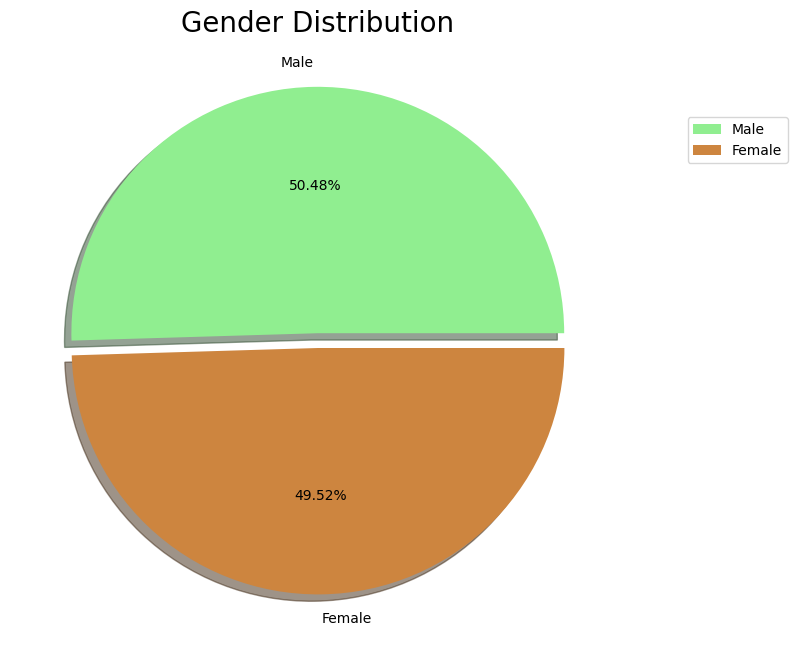

In [26]:
plt.figure(figsize=(12,8),dpi=100)
size=df['gender'].value_counts()
labels='Male','Female'
color='lightgreen','peru'
explode=[0.06,0]
plt.pie(size,colors=color,labels=labels,explode=explode,autopct='%.2f%%',shadow=True)
plt.title("Gender Distribution",size=20)
plt.legend(loc=(1.1,0.8))
plt.show()

The dataset appears to have a nearly equal distribution between Male (50.48%) and Female (49.52%) customers.

This balance indicates that gender representation in the dataset is not biased, which is beneficial for building unbiased predictive models.

In [27]:
df['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


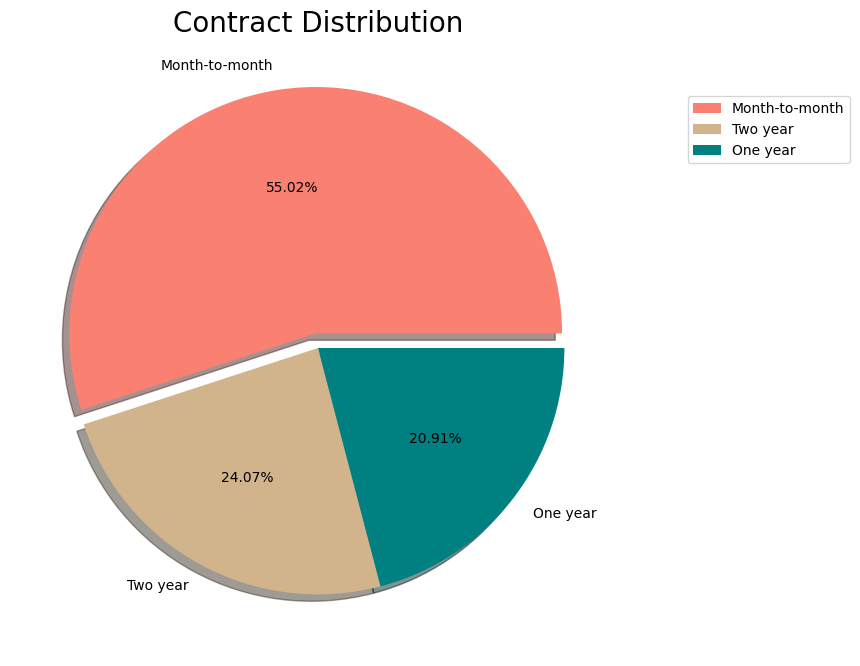

In [28]:
plt.figure(figsize=(12,8),dpi=100)
size=df['Contract'].value_counts()
labels='Month-to-month','Two year','One year'
color='salmon','tan','teal'
explode=[0.06,0,0]
plt.pie(size,colors=color,labels=labels,explode=explode,autopct='%.2f%%',shadow=True)
plt.title("Contract Distribution",size=20)
plt.legend(loc=(1.1,0.8))
plt.show()

A significant 55.02% of customers have opted for month-to-month contracts. This may indicate a preference for flexibility or hesitance to commit to longer-term contracts.

Customers with month-to-month contracts are often more likely to churn compared to those with longer-term contracts, as they can easily switch to competitors or cancel services without penalties.

This suggests that contract type could be a significant predictor in churn modeling.

In [29]:
df['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


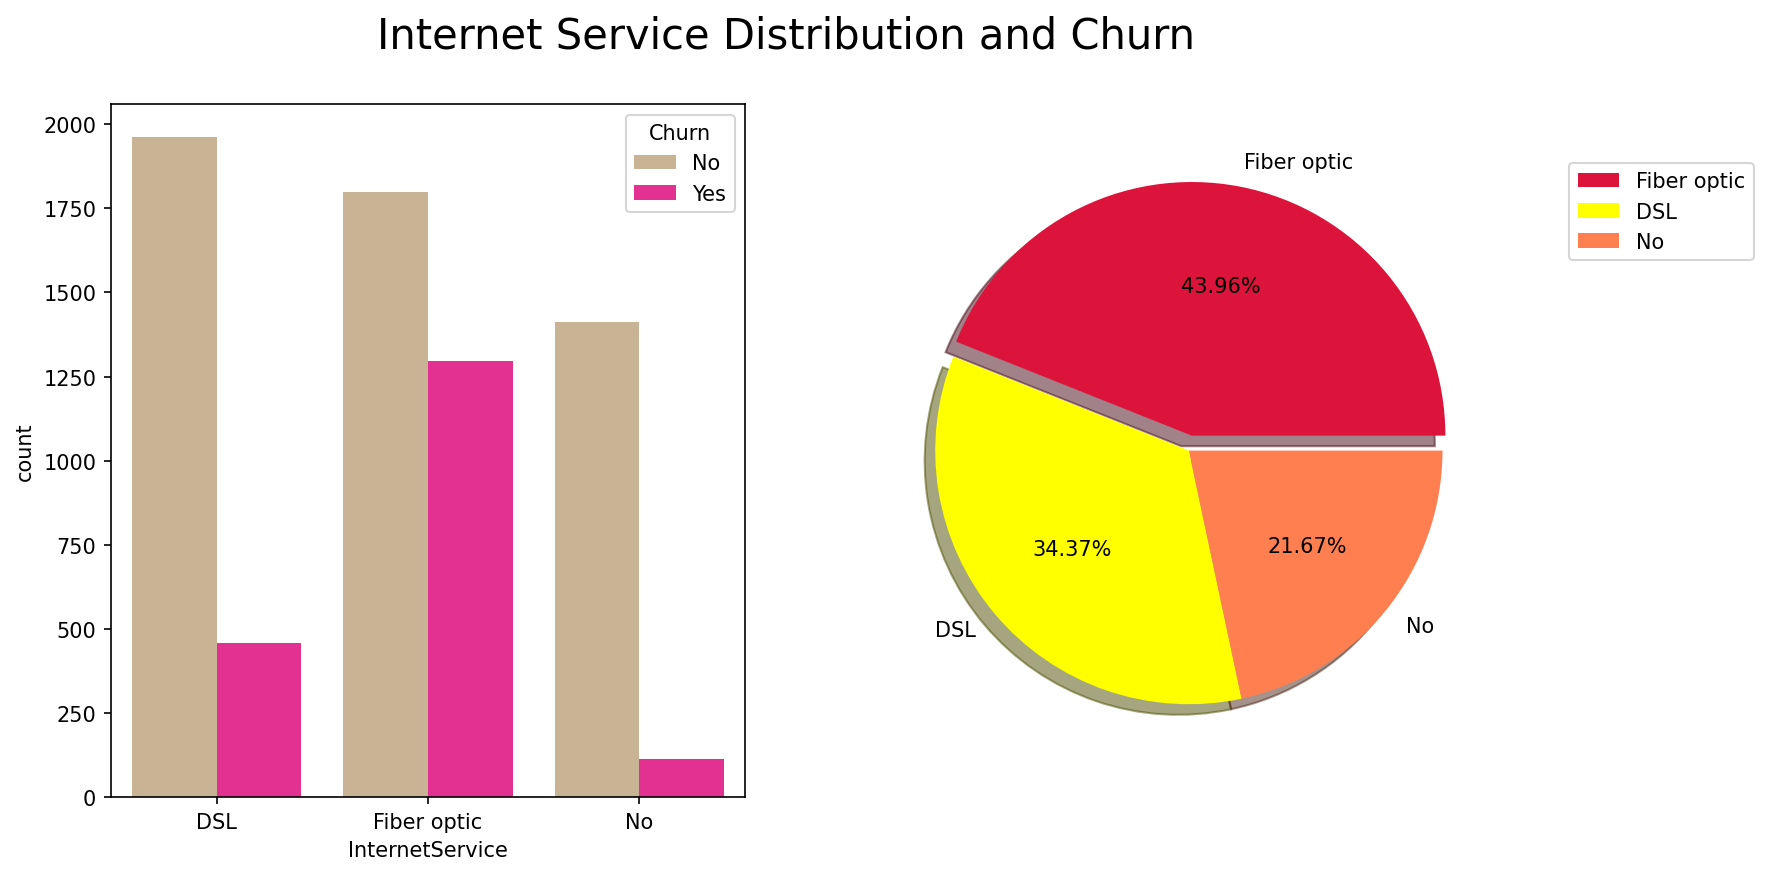

In [30]:
plt.figure(figsize=(12,6),dpi=150)
plt.subplot(1,2,1)
palette="tan","deeppink","red"
sns.countplot(x='InternetService', data=df,palette=palette,hue="Churn")

plt.subplot(1,2,2)
size=df['InternetService'].value_counts()
labels='Fiber optic','DSL','No'
color='crimson','yellow','coral'
explode=[0.06,0,0]
plt.pie(size,colors=color,labels=labels,explode=explode,autopct='%.2f%%',shadow=True)
plt.legend(loc=(1.1,0.8))
plt.suptitle("Internet Service Distribution and Churn",size=20)
plt.show()

**Insights:**

i. *Fiber Optic and Churn:*

Fiber Optic is the most popular internet service type but also exhibits the highest churn rates. This suggests dissatisfaction among Fiber Optic customers.

Potential reasons could include cost, quality of service, or competition from alternative providers.

ii. *No Internet Service:*

Customers without internet service show the least churn, likely because they are subscribed to basic services such as TV or phone, which may have lower alternatives.

iii. *Retention Opportunity:*

For Fiber Optic customers, retention strategies such as offering discounts, improving service quality, or addressing key complaints could help reduce churn.

<ipython-input-31-3e7e58e2572b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df,palette=color)


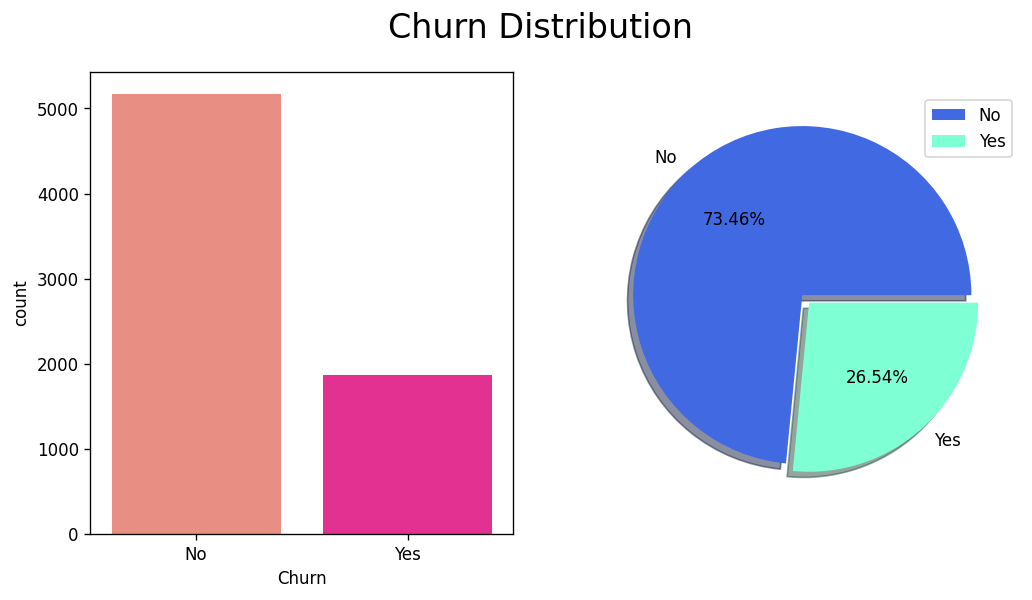

In [31]:
# Visualize churn distribution
plt.figure(figsize=(10,5),dpi=120)

plt.subplot(1,2,1)
color="salmon","deeppink"
sns.countplot(x='Churn', data=df,palette=color)

plt.subplot(1,2,2)
size=df['Churn'].value_counts()
labels='No','Yes'
color='royalblue','aquamarine'
explode=[0.06,0]
plt.pie(size,colors=color,labels=labels,explode=explode,autopct='%.2f%%',shadow=True)
plt.legend()

plt.suptitle("Churn Distribution",size=20)
plt.show()

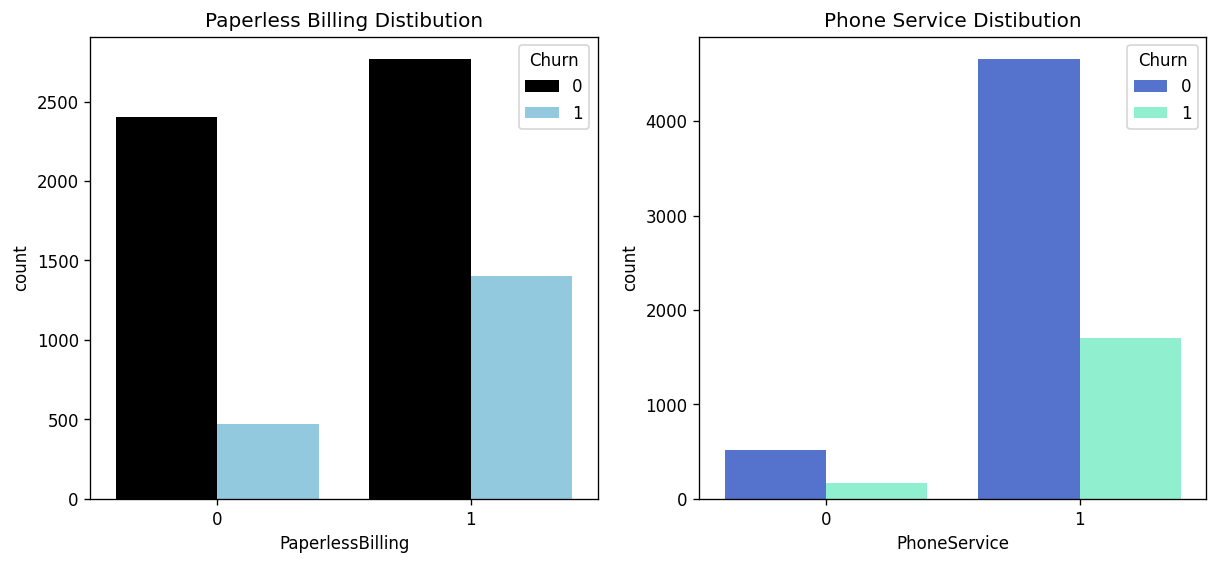

In [55]:
plt.figure(figsize=(12,5),dpi=120)

plt.subplot(1,2,1)
color="Black","Skyblue"
sns.countplot(x='PaperlessBilling', data=df,palette=color,hue="Churn")
plt.title('Paperless Billing Distibution')

plt.subplot(1,2,2)
color="Royalblue","aquamarine"
sns.countplot(x='PhoneService', data=df,palette=color,hue="Churn")
plt.title('Phone Service Distibution')
plt.show()


## **Machine Learning**

**Purpose of the ML Model**

The Customer Churn Prediction model aims to:

**Identify At-Risk Customers:** Use historical data to predict which customers are most likely to churn.

**Inform Retention Strategies:** By identifying high-risk customers, businesses can proactively offer discounts, promotions, or better service to encourage loyalty.

**Optimize Resources:** Target marketing and retention efforts more effectively, focusing on the customers most likely to leave.

## **Data Preprocessing**

In [33]:
# Dropping irrelevant columns
df.drop(['customerID'], axis=1, inplace=True)

In [34]:
# Encoding categorical variables
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.astype('category').cat.codes)

In [35]:
# Filling missing values if any
df = df.fillna(df.median())

In [36]:
# Splitting data into features (X) and target (y)
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [37]:
mn = MinMaxScaler()
X = mn.fit_transform(X)

MinMaxScaler is very useful when the data is unbalanced.

In [38]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

###**Addressing Class Imbalance**

**Synthetic Sampling:**

SMOTE (Synthetic Minority Oversampling Technique): Generate synthetic examples for the minority class.

**Class Weighting:**

Assign higher weights to the minority class during model training.

In [39]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [40]:
print("Training count:")
print(y_sm.value_counts())
print("----------------------------------------")
print("Testing count:")
print(y_test.value_counts())

Training count:
Churn
0    3622
1    3622
Name: count, dtype: int64
----------------------------------------
Testing count:
Churn
0    1552
1     561
Name: count, dtype: int64


The dataset is divided into 70% for training and 30% for testing

## **Model Training and Hyperparameter Tuning**

**Logistic Regression** is a linear model for binary classification tasks. It predicts probabilities for the two classes (e.g., churn or no churn) using a logistic function.

**Random Forest** is an ensemble learning method that combines multiple decision trees to improve prediction accuracy and control overfitting.

**Gradient Boosting** builds an ensemble of trees sequentially, optimizing each new tree to correct errors made by the previous ones.

**Support Vector Machine(SVM)** finds a hyperplane in a high-dimensional space that maximizes the margin between classes. With a kernel trick, it can capture nonlinear relationships.

In [41]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
}



**Hyperparameters** are configurations set before training a machine learning model that govern its behavior, such as the complexity of the model or how it learns.

Examples include the number of trees in a Random Forest, the learning rate in Gradient Boosting, or the maximum number of iterations in Logistic Regression. Tuning these parameters (e.g., using GridSearchCV) helps optimize the model’s performance and avoid overfitting or underfitting.

In [42]:
# Hyperparameters for GridSearchCV (selected models only)
param_grids = {
    "Logistic Regression":{
        'max_iter': [100,250,500,1000]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 150],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10],
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
    },
}

By training multiple models, we aim to compare their performances (e.g., using Accuracy,Recall, Persion and ROC-AUC) and identify the most suitable one for predicting customer churn. Each model brings unique strengths, allowing us to account for different data patterns and relationships.

In [43]:
model_results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    # If model has hyperparameters to tune
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], scoring='roc_auc', cv=5, verbose=2)
        grid_search.fit(X_sm, y_sm)
        model = grid_search.best_estimator_
        print(f"Best Parameters for {name}: {grid_search.best_params_}")
    else:
        model.fit(X_sm, y_sm)


Training Logistic Regression...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .......................................max_iter=100; total time=   0.1s
[CV] END .......................................max_iter=100; total time=   0.0s
[CV] END .......................................max_iter=100; total time=   0.0s
[CV] END .......................................max_iter=100; total time=   0.0s
[CV] END .......................................max_iter=100; total time=   0.1s
[CV] END .......................................max_iter=250; total time=   0.1s
[CV] END .......................................max_iter=250; total time=   0.0s
[CV] END .......................................max_iter=250; total time=   0.0s
[CV] END .......................................max_iter=250; total time=   0.0s
[CV] END .......................................max_iter=250; total time=   0.0s
[CV] END .......................................max_iter=500; total time=   0.0s
[CV] END .......

## **Model Evaluation**

###**Evaluation Metrics:**

**Accuracy:** Measures the overall correctness of the model by dividing the number of correct predictions by the total predictions.

**ROC-AUC:** Evaluates the ability of the model to distinguish between classes, based on the predicted probabilities.

**Recall:** Focuses on the model's ability to correctly identify positive samples.

**Classification Report:** Provides a detailed summary of precision, recall, F1-score, and support for each class.

In [46]:
for name, model in models.items():
    print(f"\nEvaluation of {name}...")
    model.fit(X_sm, y_sm)
    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    # Evaluate performance
    accuracy=accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    recall=recall_score(y_test,y_pred)
    print(f"Accuracy:{accuracy}")
    print(f"ROC-AUC Score: {roc_auc}")
    print(f"Recall Score: {recall}")
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))

    print("-------------------------------------------------------------------------------")
    # Store results for comparison
    model_results[name] = {
        "model": model,
        "Accuracy": accuracy,
        "roc_auc": roc_auc,
        "recall": recall,
        "classification_report": classification_report(y_test, y_pred, output_dict=True),
    }


Evaluation of Logistic Regression...
Accuracy:0.7368670137245622
ROC-AUC Score: 0.8400896089457338
Recall Score: 0.7914438502673797
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1552
           1       0.50      0.79      0.61       561

    accuracy                           0.74      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.80      0.74      0.75      2113

-------------------------------------------------------------------------------

Evaluation of Random Forest...
Accuracy:0.7870326549929011
ROC-AUC Score: 0.8189846463421357
Recall Score: 0.5989304812834224
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1552
           1       0.60      0.60      0.60       561

    accuracy                           0.79      2113
   macro avg       0.73  

In [47]:
# Compare models
comparison_df = pd.DataFrame({
    "Model": list(model_results.keys()),
    "Accuracy Score": [res["Accuracy"] for res in model_results.values()],
})
comparison_df = comparison_df.sort_values(by="Accuracy Score", ascending=False)

# Print model comparison
print("\nModel Comparison:")
print(comparison_df)


Model Comparison:
                    Model  Accuracy Score
1           Random Forest        0.787033
2       Gradient Boosting        0.777567
3  Support Vector Machine        0.749172
0     Logistic Regression        0.736867


**Here's an interpretation of the results:**

**Gradient Boosting** performs the best with an accuracy score of 0.777, making it the most accurate model for this dataset. It effectively balances bias and variance through boosting.

**Random Forest** closely follows with an accuracy score of 0.787. Its ensemble approach, combining multiple decision trees, offers robust performance.

**Support Vector Machine (SVM)** achieves a slightly lower accuracy of 0.749, showing its ability to classify well but falling short compared to ensemble methods.

**Logistic Regression** has the lowest accuracy at 0.736, as it is a simpler linear model that might struggle to capture complex patterns in the data.

<ipython-input-51-3a08ff4a05e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy Score", y="Model", data=comparison_df, palette="cool")


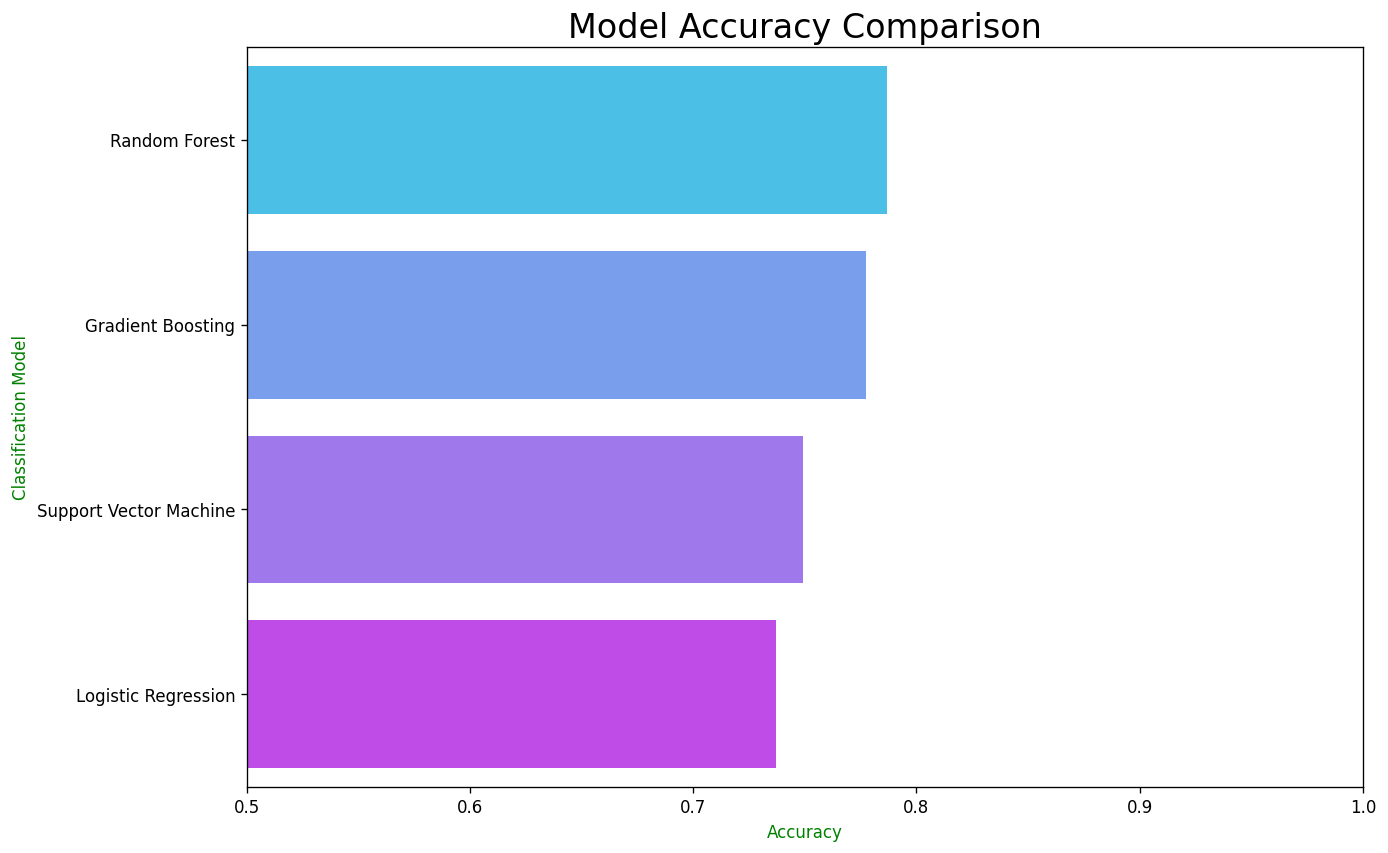

In [51]:
# Visualize Accuracy Scores
plt.figure(figsize=(12,8),dpi=120)
sns.barplot(x="Accuracy Score", y="Model", data=comparison_df, palette="cool")
plt.title("Model Accuracy Comparison",fontsize=20)
plt.xlabel("Accuracy",color='green')
plt.ylabel("Classification Model",color='green')
plt.xlim(0.5,1)
plt.show()


**Insights:**

Ensemble models (Gradient Boosting and Random Forest) outperform simpler models, likely due to their ability to model complex relationships.

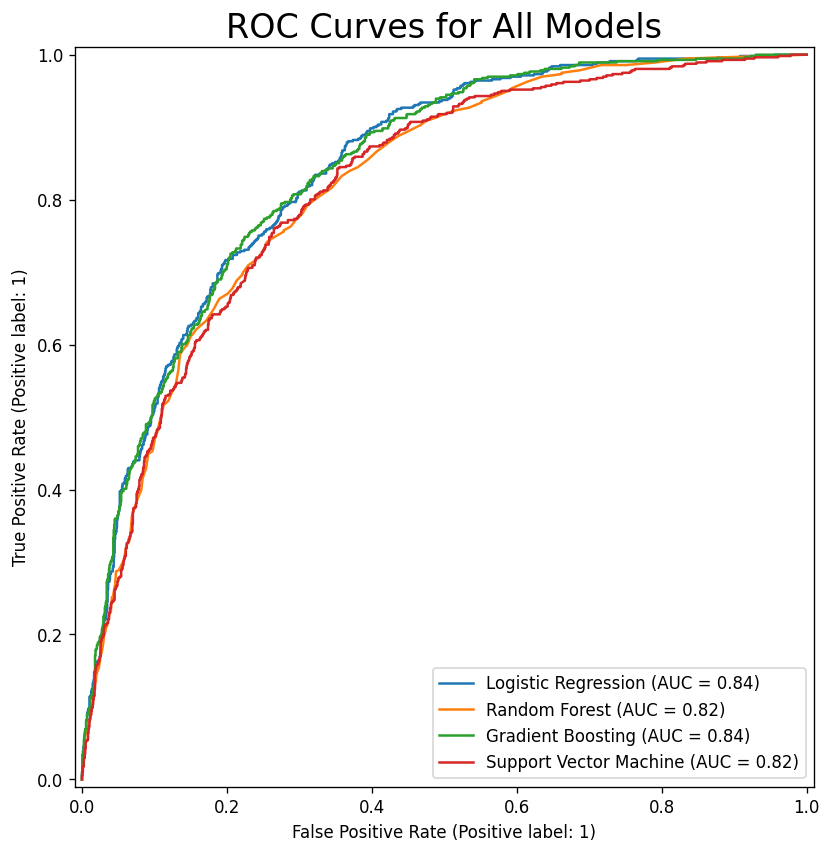

In [54]:
# Plot ROC Curves
plt.figure(figsize=(12, 8),dpi=120)
for name, res in model_results.items():
    RocCurveDisplay.from_estimator(res["model"], X_test, y_test, name=name, ax=plt.gca())
plt.title("ROC Curves for All Models",fontsize=20)
plt.show()

## **Deep Learning**

###**Model Architecture**

**Input Layer:**

The first layer has 64 neurons with ReLU activation, and the input size matches the number of features in X_train.

**Hidden Layers:**

A sequence of dense layers:

*Second layer:* 32 neurons with ReLU activation.

*Third layer:* 32 neurons with ReLU activation.

Dropout layers are used after each hidden layer (with rates 0.3 and 0.2) to reduce overfitting by randomly deactivating some neurons during training.

**Output Layer:**

A single neuron with a sigmoid activation function, which outputs a probability value for binary classification.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_sm, y_sm, epochs=40, batch_size=8, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
725/725 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7000 - loss: 0.5676 - val_accuracy: 0.7453 - val_loss: 0.5799
Epoch 2/40
725/725 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7614 - loss: 0.4931 - val_accuracy: 0.6556 - val_loss: 0.7230
Epoch 3/40
725/725 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7848 - loss: 0.4682 - val_accuracy: 0.6763 - val_loss: 0.6578
Epoch 4/40
725/725 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7906 - loss: 0.4474 - val_accuracy: 0.6605 - val_loss: 0.6651
Epoch 5/40
725/725 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7876 - loss: 0.4583 - val_accuracy: 0.7150 - val_loss: 0.5617
Epoch 6/40
725/725 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7874 - loss: 0.4528 - val_accuracy: 0.7005 - val_loss: 0.5628
Epoch 7/40
725/725 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7806 - loss: 0.4572 - val_accuracy: 0.6839 - val_loss: 0.6154
Epoch 8/40
725/725 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7924 - loss: 0.4477 - val_accuracy: 0.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Predict probabilities and convert to binary predictions
y_proba = model.predict(X_test)  # Outputs probabilities
y_pred = (y_proba > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Full Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.76
Precision: 0.54
Recall: 0.63

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      1552
           1       0.54      0.63      0.58       561

    accuracy                           0.76      2113
   macro avg       0.70      0.72      0.71      2113
weighted avg       0.77      0.76      0.77      2113



The model achieved an accuracy of 76%, meaning it correctly predicted 76% of the total instances. While this is reasonable, it may not fully reflect performance on imbalanced datasets.

The model performs well for the majority class but struggles with the minority class, likely due to class imbalance.

---



---

